In [1]:
!pip install -q datasets transformers librosa jiwer accelerate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## __1.Load datasets__

In [2]:
# ✅ [2] 4개 언어 × 100개씩 로드
from datasets import load_dataset, Dataset
from itertools import islice

ko = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

dataset = Dataset.from_list(ko + en + ja + de)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 738.32it/s]
Reading metadata...: 1013968it [00:22, 45728.29it/s]
Reading metadata...: 7071it [00:00, 20763.47it/s]
Reading metadata...: 540437it [00:12, 41864.17it/s]


## __2.Whisper-base__

In [3]:
# ✅ [3] Whisper-base 모델 & Processor 설정
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-base"

processor = WhisperProcessor.from_pretrained(checkpoint, language=None, task="transcribe")
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

## __3.Preprocessing__

In [4]:
# ✅ [4] 전처리 함수 정의 및 적용
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
# ✅ [5] DataCollator 정의
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [6]:
# ✅ [6] 학습 파라미터 설정
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_multi_base_trial1",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=5,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-14df4f870716>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## __4.Training__

In [7]:
# ✅ [7] 학습 시작
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
5,7.854200
10,6.941300
15,6.791600
20,6.450700
25,5.160500
30,4.984700
35,4.489900
40,4.369800
45,4.311800
50,4.241000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=2.6566216309865314, metrics={'train_runtime': 179.6151, 'train_samples_per_second': 6.681, 'train_steps_per_second': 1.67, 'total_flos': 7.7831995392e+16, 'train_loss': 2.6566216309865314, 'epoch': 3.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_multi_base_trial1"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

## __5.Prediction__

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

def filter_by_lang(dataset, lang_code):
    return [x for x in dataset if x["locale"] == lang_code]

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"\n🌍 Language: {lang}")
    lang_data = filter_by_lang(dataset, lang)

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"\n🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

        torch.cuda.empty_cache()

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"\n✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:01<01:41,  1.02s/it]


🔹 Predicted:  아워라ugh, 그 타운 바람들 하루를 남기고 다시 실낙하겠다고 그의 룰퓨의 보랏을.
🔸 Reference: 어느덧 그 더운 팔월도 하루를 남기고 다 지나 버렸다.


  2%|▏         | 2/100 [00:01<01:01,  1.59it/s]


🔹 Predicted: 軍자의 침�에�은野生의 영원한 사항 속눈썹이 돌아가りゃあった。
🔸 Reference: 근자에 춘우의 동료 사이에는 이상한 소문이 돌아다니었다.


  3%|▎         | 3/100 [00:01<00:45,  2.14it/s]


🔹 Predicted:  제작을 하는 소리를 듣고야, 웃음 빛는 걸길 때 왔다.
🔸 Reference: 재차 부르는 소리를 듣고야 선비는 발길을 떼었다.


  4%|▍         | 4/100 [00:01<00:35,  2.70it/s]


🔹 Predicted:  그의 바일 것이고 최저가 봤으면 되는 것 같네.
🔸 Reference: 그애의 말값으로 찾아나 봤으면 되는 것 아니냐.


  6%|▌         | 6/100 [00:02<00:26,  3.52it/s]


🔹 Predicted:  그가 방으로 뒤로 어디 간만이가 왔어 그의 하단 일을 하고 있었다.
🔸 Reference: 그가 방으로 들어오니 간난이가 와서 그의 하던 일을 하고 있었다.

🔹 Predicted:  Annea, Daniel, Schoen.
🔸 Reference: 안녕히 다녀옵시요.


  7%|▋         | 7/100 [00:02<00:28,  3.23it/s]


🔹 Predicted:  어땠렇게 무엇부터 싸러리야 할는지 엄두가 나지를 않아서 잠을 지올 수가 없었다.
🔸 Reference: 어떻게 무엇부터 시작을 해야 할는지 엄두가 나지를 않아서 잠을 잘 수가 없었다.


  8%|▊         | 8/100 [00:02<00:25,  3.56it/s]


🔹 Predicted: きっと、きっとされた事にハマでやらない。
🔸 Reference: 죽는 날까지 하늘을 우러러


 10%|█         | 10/100 [00:03<00:20,  4.31it/s]


🔹 Predicted: 그리고 그 어두운 방안이 희치워진다.
🔸 Reference: 그리고 그 어두운 방 안이 휙 지나친다.

🔹 Predicted: これらのプロで言ってしまった
🔸 Reference: 왜 눈을 바루 뜨지 못해!


 11%|█         | 11/100 [00:03<00:24,  3.61it/s]


🔹 Predicted:  영신은 바라로 엉데로 바닷가 온다. 그한을 집에서 면을 실수가 있었다.
🔸 Reference: 영신은 바라던 대로 바닷가 한가한 집에서 편안히 쉴 수가 있었다.


 12%|█▏        | 12/100 [00:03<00:22,  3.87it/s]


🔹 Predicted:  잡는 사운로자 홈으로 피워도 잡자.
🔸 Reference: 잡을 수 없는 저 하늘의 별도 잡자.


 13%|█▎        | 13/100 [00:04<00:26,  3.33it/s]


🔹 Predicted:  그는 가공몸의 소리가 들을 때렸다.
🔸 Reference: 하고, 목메인 소리가 뒤를 따랐다.


 15%|█▌        | 15/100 [00:04<00:21,  3.89it/s]


🔹 Predicted: 그리고 그의 하던 마마무는 오금부터 그의하였다.
🔸 Reference: 그리고 그의 하던 말을 곰곰이 되풀이하였다.

🔹 Predicted: よりなんてしようなティングがある
🔸 Reference: 영원한 것이 어디 있는가?


 16%|█▌        | 16/100 [00:05<00:23,  3.53it/s]


🔹 Predicted: 그것은 예술을 십니다만, 바퀴는 기후로 부르짖은 말이었다.
🔸 Reference: 그것은 예수가 십자가에 못박히며 최후로 부르짖은 말이었다.


 17%|█▋        | 17/100 [00:05<00:23,  3.58it/s]


🔹 Predicted:  그 틈의 그 진저는 단몸이 매우 달아난다.
🔸 Reference: 그 틈에 그 짐짝은 딴놈이 메고 달아난다.


 18%|█▊        | 18/100 [00:05<00:24,  3.36it/s]


🔹 Predicted:  그는 이런 생각을 들으려 부리하는 새 벌써 선낭넘니 짙고 들어왔다.
🔸 Reference: 그는 이러한 생각을 되풀이하는 새 벌써 간난네 집까지 왔다.


 19%|█▉        | 19/100 [00:06<00:24,  3.29it/s]


🔹 Predicted:  영식대로 지저러미 부리고기를 넘기는 것만치 나까 아마 듣는 것 같습니다.
🔸 Reference: 양식 떨어진 사람이 보릿고개를 넘기는것만치 나 까마아득한 것 같습니다.


 20%|██        | 20/100 [00:06<00:24,  3.28it/s]


🔹 Predicted: 冰術に乱く散らうおそこに行こうわらった。
🔸 Reference: 그래서 그는 억지로 웃어 보이고 말았다.


 21%|██        | 21/100 [00:06<00:22,  3.48it/s]


🔹 Predicted: 견의 그제심이야 집단과 버트리스러웠다.
🔸 Reference: 연해 꾸짖으며 질팡갈팡 뛰는 수밖에 없었다.


 23%|██▎       | 23/100 [00:06<00:17,  4.45it/s]


🔹 Predicted:  영신을 높이고 자세히 숨체를 가본다.
🔸 Reference: 영신을 눕히고 자세히 진찰을 해본다.

🔹 Predicted: うしっているならば、
🔸 Reference: 몇 시 퇴근하려고?


 24%|██▍       | 24/100 [00:07<00:17,  4.22it/s]


🔹 Predicted: 국뒤의 영원회에서 영원하신 사람은 얼마나 준비할 수 있다.
🔸 Reference: 국회는 의원의 자격을 심사하며, 의원을 징계할 수 있다.


 25%|██▌       | 25/100 [00:07<00:22,  3.27it/s]


🔹 Predicted: あたりもどんどんどく、チュッカーを見るせいは、ついて、無駄真実にいるものじゃないか。
🔸 Reference: 아담이 모든 육축과 공중의 새와 들의 모든 짐승에게 이름을 주니라


 26%|██▌       | 26/100 [00:08<00:23,  3.11it/s]


🔹 Predicted:  그 뒤로 뒷백博車 같은 집들이 오룩みを取ってさ、オンや 들어간다.
🔸 Reference: 그 뒤로 게 딱지 같은 집들이 오글오글 쫓겨서 몰려들어 간다.


 27%|██▋       | 27/100 [00:08<00:24,  3.01it/s]


🔹 Predicted: 그리고 그의 옷이 땀에 비해 아름다운 아님은 아름다운 맛인 것 같다.
🔸 Reference: 그리고 그의 옷이 땀에 배어 어룽어룽하니 말라진 것을 보았다.


 28%|██▊       | 28/100 [00:08<00:22,  3.27it/s]


🔹 Predicted:  징역은 자기 아버지가 억지히 대신 것을 알았다.
🔸 Reference: 춘우는 자기 아버지가 약주 취하신 것을 알았다.


 29%|██▉       | 29/100 [00:08<00:21,  3.30it/s]


🔹 Predicted: ジリリもお腫れっぽじめらおうぐり落っこやった。
🔸 Reference: 찌르릉 하고 창자에 퍼지며 얼굴이 화끈하였다.


 30%|███       | 30/100 [00:09<00:21,  3.32it/s]


🔹 Predicted:  버려온 가득선이처럼 사자하고 버리면 아깃섭시선이 있다.
🔸 Reference: 바람은 파도 소리처럼 쏴아쏴아 하고 머리 맡에서 뒤설렌다.

🔹 Predicted:  친구에게 이 모든 사정의 말을 하여 버릴까.
🔸 Reference: 춘우에게 이 모든 사정의 말을 하여 버릴까.


 32%|███▏      | 32/100 [00:09<00:20,  3.33it/s]


🔹 Predicted: きがのさらに国家のあるマンクンケーキの覚悪なのにあることだった。
🔸 Reference: 길 가는 사람이 걱정을 하리만큼 그의 걸음은 황급하였다.


 34%|███▍      | 34/100 [00:10<00:21,  3.12it/s]


🔹 Predicted: ゾンビの絡まれが、ゾロッキリッティチュラーティーの中でまだ申し実に見せる可能がしっかり進まれました。
🔸 Reference: 선비는 간난이가 저렇게 늦게 돌아올 때마다 무엇을 깊이 생각하는 것이 수상스러웠다.

🔹 Predicted:  그호가 말한답게 성식계였습니다.
🔸 Reference: 부엌은 아름답게 장식되었습니다.


 35%|███▌      | 35/100 [00:10<00:21,  3.09it/s]


🔹 Predicted: 進nowi nonga mongi kiasu mongo kumad nonganomu heitta.
🔸 Reference: 신철이는 할멈이 깨었으므로 그만 낙망을 하였다.


 36%|███▌      | 36/100 [00:11<00:19,  3.24it/s]


🔹 Predicted:  눕ざっさな 얼굴을 쳐리고 첫째의 눈치에서 해본다.
🔸 Reference: 납작한 얼굴을 쳐들고 첫째의 눈치를 살살 본다.


 38%|███▊      | 38/100 [00:11<00:18,  3.40it/s]


🔹 Predicted: あたんがくやあねが、ヨーザーのニュミがチェックやられてんじゃんまもさえるスムンズ
🔸 Reference: 아담과 그 아내가 여호와 하나님의 낯을 피하여 동산 나무 사이에 숨은지라

🔹 Predicted:  나는 저 번째에게 입고 왔습니다.
🔸 Reference: 나는 두 번째 그에게 물었습니다.


 39%|███▉      | 39/100 [00:11<00:15,  3.93it/s]


🔹 Predicted: うそし、いいさしりだ。
🔸 Reference: 무소식이 희소식이다


 40%|████      | 40/100 [00:12<00:15,  3.84it/s]


🔹 Predicted: 그는 대답다しがねえによく見ることがほしいことでした。
🔸 Reference: 그는 대답 대신에 늘 이렇게 웃는 것이 버릇이다.


 42%|████▏     | 42/100 [00:12<00:14,  4.02it/s]


🔹 Predicted:  그절로 이 가치식을 비워하는 의원와 동해야리를 짚어왔시하게 하며
🔸 Reference: 대저 너희가 지식을 미워하며 여호와 경외하기를 즐거워하지 아니하며

🔹 Predicted:  견디閃てすみだ
🔸 Reference: 경기 시작됐습니다.


 43%|████▎     | 43/100 [00:13<00:16,  3.40it/s]


🔹 Predicted:  선명히 욕득상몬에 가만히 억지로 와서 동물이 아껴라며 되찾다.
🔸 Reference: 선비는 육백삼호인 가마 곁으로 와서 동무의 어깨를 가볍게 쳤다.


 44%|████▍     | 44/100 [00:13<00:17,  3.23it/s]


🔹 Predicted:  그 예서 간만하고 어린앤 눈을 둔 그렇게 뜨고든 치유새뒀다.
🔸 Reference: 그래서 간난 어머니는 눈을 둥그렇게 뜨고 눈치를 살폈다.


 45%|████▌     | 45/100 [00:13<00:16,  3.28it/s]


🔹 Predicted: 그러자 엉몸하고 오는 게 또 내 목소리를 들은 게 싶다.
🔸 Reference: 그러자 엉엉 하고 우는 개똥이의 곡성을 들은 듯싶다.


 46%|████▌     | 46/100 [00:14<00:17,  3.12it/s]


🔹 Predicted: 그러나 무엇이라 꼭 집어대야, 그 사회가 아주 신질질 짓고 낼 수는 없었다.
🔸 Reference: 그러나 무엇이라고 꼭 집어대어 철수와 같이 술술 지껄일수는 없었다.


 47%|████▋     | 47/100 [00:14<00:18,  2.93it/s]


🔹 Predicted: 그러면 이 시기에 동의하지 않는 것은 진정, 진정 바람을 말한 피하나는 물을 짓고 있다.
🔸 Reference: 고난의 시기에 동요하지 않는 것은 진정 칭찬받을 만한 뛰어난 인물의 증거다.


 48%|████▊     | 48/100 [00:14<00:16,  3.08it/s]


🔹 Predicted:  영신은 다시 부르짖듯이 신앙에 대선자에게 고소한다.
🔸 Reference: 영신은 다시 부르짖듯이 신앙의 대상자에게 호소한다.


 49%|████▉     | 49/100 [00:15<00:16,  3.00it/s]


🔹 Predicted: 그리고 선비의 그 고원한 방에 미소를 띠고 지나치는 것을 그는 확실히 고웠다.
🔸 Reference: 그리고 선비의 그 고운 얼굴이 미소를 띠고 지나치는 것을 그는 확실히 보았다.


 51%|█████     | 51/100 [00:15<00:13,  3.70it/s]


🔹 Predicted:  나의 교훈을 받지 않게 하고 나의 모든 증만을 없이 려갔습니다.
🔸 Reference: 나의 교훈을 받지 아니하고 나의 모든 책망을 업신여겼음이라

🔹 Predicted:  그 자네에서 운난다.
🔸 Reference: 개천에서 용 난다


 52%|█████▏    | 52/100 [00:15<00:14,  3.37it/s]


🔹 Predicted:  나는 그 아일부로 가 오니 하나 오는 순간, 나는 끝까지 진정되고 흔검 됐습니다.
🔸 Reference: 나는 그 알레그로가 울리어 나오는 순간 마음은 끝까지 긴장되고 흥분되었습니다.


 53%|█████▎    | 53/100 [00:16<00:13,  3.58it/s]


🔹 Predicted:  선비가 이 공장을 돌아온 지가 벌써 거의 이해가 온다.
🔸 Reference: 선비가 이 공장에 들어온 지가 벌써 거의 일년이 되어 온다.


 54%|█████▍    | 54/100 [00:16<00:12,  3.54it/s]


🔹 Predicted:  벌써 부터 이런 생각을 받았으나 용의하의 기회를 더는 수가 없었다.
🔸 Reference: 벌써부터 이런 생각을 가졌으나 용이하게 기회를 타는 수가 없었다.


 55%|█████▌    | 55/100 [00:16<00:13,  3.35it/s]


🔹 Predicted: 그는 종일 그가 고아년 질여를 하여 신철에게 무엇을 서서 보았다.
🔸 Reference: 그는 종잇조각과 연필을 내어 신철에게 무엇을 써서 보였다.


 56%|█████▌    | 56/100 [00:17<00:13,  3.27it/s]


🔹 Predicted:  선복재판소집은 본인 정당의 가입하거나 정치의 관여할 수 없다.
🔸 Reference: 헌법재판소 재판관은 정당에 가입하거나 정치에 관여할 수 없다.


 57%|█████▋    | 57/100 [00:17<00:13,  3.29it/s]


🔹 Predicted:  이번엔 제록 묵석들이 곁에 있는 남학생의 질문이 들어갔다.
🔸 Reference: 이번엔 제법 목소리가 패인 남학생의 질문이 들어왔다.


 58%|█████▊    | 58/100 [00:17<00:12,  3.38it/s]


🔹 Predicted: 한번의 실패와 영원한 실패를 혼도하지 마라.
🔸 Reference: 한번의 실패와 영원한 실패를 혼동하지 마라.


 59%|█████▉    | 59/100 [00:18<00:13,  3.13it/s]


🔹 Predicted: バンバーイスリメンは、これが壊れし、オッケージの力をやりなかった。
🔸 Reference: 방망이 소리는 그가 걸을수록 점점 희미하게 들렸다.


 60%|██████    | 60/100 [00:18<00:11,  3.41it/s]


🔹 Predicted:  모든 공기는 방문과 예술의 자유가 가진다.
🔸 Reference: 모든 국민은 학문과 예술의 자유를 가진다.


 62%|██████▏   | 62/100 [00:18<00:11,  3.45it/s]


🔹 Predicted:  박생돈은 보웨자는 박생 본인의 관한 석경 기록을 언제든지 하나만 권위를 가진다.
🔸 Reference: 학생 또는 보호자는 학생 본인에 관한 학교 기록을 언제든지 열람할 권리를 가진다.

🔹 Predicted: 그는 방 밋 게 착�った阻った
🔸 Reference: 그는 담 밑에 착 붙어 섰다.


 63%|██████▎   | 63/100 [00:19<00:09,  3.97it/s]


🔹 Predicted:  사람은 말이지 말하는 게 아니야.
🔸 Reference: 사랑은 말이지, 소유하는 게 아니야.


 64%|██████▍   | 64/100 [00:19<00:09,  3.81it/s]


🔹 Predicted: 福山県 여전히 보호하고 소금소금이 아디를 했다.
🔸 Reference: 효애는 여전히 뭐라고 소곤소곤 이야기를 하였다.


 65%|██████▌   | 65/100 [00:19<00:08,  3.96it/s]


🔹 Predicted:  정신 뒤에 회원들은 적담을 하며 정치시었다.
🔸 Reference: 점심 뒤에 회원들은 잡담을 하며 잠시 쉬었다.


 66%|██████▌   | 66/100 [00:19<00:09,  3.43it/s]


🔹 Predicted: 영신은 그제야 그전의 백시의 집에서 들은 동랄의 말을 제풀이가 듯하였다.
🔸 Reference: 영신은 그제야 그전에 백씨의 집에서 들은 동혁의 말을 되풀이하듯 하였다.


 67%|██████▋   | 67/100 [00:20<00:08,  3.75it/s]


🔹 Predicted:  세상에 나의 마음을 알아주는 사람이 어디 있어야죠.
🔸 Reference: 세상에 나의 마음을 알아 주는 사람이 어디 있어야죠.


 68%|██████▊   | 68/100 [00:20<00:09,  3.53it/s]


🔹 Predicted: コロジションミョウオンジャックの日常に関係ないのにしようと
🔸 Reference: 부르짖으며 저 혼자 감격하는 것이었다.


 69%|██████▉   | 69/100 [00:20<00:09,  3.14it/s]


🔹 Predicted:  지우아들은 방속에다 집은 그 아버지의 손장을 제천하고 서로 잡아상길 듯이 다치고 있었습니다.
🔸 Reference: 두 아들은 방 속에다 죽은 그 아버지의 송장을 제쳐놓고 서로 잡아삼킬 듯이 다투고 있었습니다.


 70%|███████   | 70/100 [00:21<00:09,  3.07it/s]


🔹 Predicted:  여자가 그니디 말아들 동선 남아의 실리골을 우리가 묶을 수 있으나
🔸 Reference: 여자가 뱀에게 말하되 동산 나무의 실과를 우리가 먹을 수 있으나


 71%|███████   | 71/100 [00:21<00:08,  3.42it/s]


🔹 Predicted:  국가는 국가표진 여덟을 확륙한다.
🔸 Reference: 국가는 국가표준제도를 확립한다.


 72%|███████▏  | 72/100 [00:21<00:08,  3.40it/s]


🔹 Predicted:  다른 나무 보기 동무지하지 말고, 뭐지? 그다 혼자의 힘으로 하라.
🔸 Reference: 다른 누구에게도 의지하지 말고 오직 그대 혼자의 힘으로 하라.


 74%|███████▍  | 74/100 [00:22<00:06,  3.94it/s]


🔹 Predicted:  가버리는 이자를 붙잡히러 온 그한 마쳤다.
🔸 Reference: 까불이는 의자를 버쩍 들어 옮겨 놔주었다.

🔹 Predicted: 그다 좋아할 때마다 이런 부를 수 있었다.
🔸 Reference: 그가 좋아할 때마다 이런 버릇이 있었다.


 75%|███████▌  | 75/100 [00:22<00:06,  3.58it/s]


🔹 Predicted:  전혁들둘자만 엉지구를 못봤다. 전혁을 깨친다.
🔸 Reference: 탄핵결정은 공직으로부터 파면함에 그친다.


 76%|███████▌  | 76/100 [00:22<00:07,  3.31it/s]


🔹 Predicted:  한편으로 그 가위 영신을 잘 수 있는 대로 호희로서 이해하려면 못높다.
🔸 Reference: 한편으로 그가 영신을 될 수 있는 대로 호의로써 이해하려는 것도 물론이다.


 77%|███████▋  | 77/100 [00:23<00:07,  3.19it/s]


🔹 Predicted:  선비는 얼굴이 뻘게 해서 감아에서 꼭 하나 오는 시그치 랩을 하고 왔다.
🔸 Reference: 선비는 얼굴이 뻘개서 가마에서 뽑혀 나오는 실끝을 들여다보았다.


 78%|███████▊  | 78/100 [00:23<00:07,  3.12it/s]


🔹 Predicted:  목적패라고 봤으며 더 당분간은 아무것도 목질은 없도록지 않기로 했다.
🔸 Reference: 무척 배가 고팠음에도 당분간은 아무것도 먹지 않기로 했다.


 79%|███████▉  | 79/100 [00:23<00:06,  3.17it/s]


🔹 Predicted:  신철이는 영철의 오는 소리를 들으며 몸박끌하셨다.
🔸 Reference: 신철이는 영철의 우는 소리를 들으며 문밖을 나섰다.


 81%|████████  | 81/100 [00:24<00:05,  3.76it/s]


🔹 Predicted:  국은 사오십년 뒤에 조선은 모델을 생겨라 이하기라고 생각하기도 좋다.
🔸 Reference: 혹은 사오십 년 뒤에 조선을 무대로 생겨날 이야기라고 생각하여도 좋다.

🔹 Predicted: うびそろしさを
🔸 Reference: 어디서 오셨어요?


 82%|████████▏ | 82/100 [00:24<00:04,  3.67it/s]


🔹 Predicted:  그 코는 문 안에 선체의 선비에 문의를 바라보며 복장을 한다.
🔸 Reference: 덕호는 문 안에 선 채 선비 어머니를 바라보며 걱정을 한다.


 83%|████████▎ | 83/100 [00:24<00:04,  3.51it/s]


🔹 Predicted:  그리고 물어라고 손질을 더워본 치고 물을 바퀴로 사라진다.
🔸 Reference: 그리고 무어라고 손질을 두어 번 치고 모밀 밭뒤로 사라진다.


 84%|████████▍ | 84/100 [00:25<00:04,  3.26it/s]


🔹 Predicted:  선비는 치아키도 만지지 않으면 앞이 허전한 것 같아서 기념도 끝도 있었다.
🔸 Reference: 선비는 씨아틀도 만지지 않으면 앞이 허전한 것 같아서 그냥 붙들고 있었다.


 85%|████████▌ | 85/100 [00:25<00:04,  3.37it/s]


🔹 Predicted:  동시에 잠깐 잊었던 아픔이 그의 전신을 못된 리를 시작했다.
🔸 Reference: 동시에 잠깐 잊었던 아픔이 그의 전신을 못 견디게 습격하였다.


 86%|████████▌ | 86/100 [00:25<00:04,  2.97it/s]


🔹 Predicted: 卓地는 무적처하고 벗었다다, 다시 더 고혁이 피해를 혼박히 돌아서 그의 집으로 왔다.
🔸 Reference: 첫째는 무정처하고 걷다가 다시 덕호의 집 주위를 한 바퀴 돌아서 그의 집으로 왔다.


 87%|████████▋ | 87/100 [00:26<00:04,  3.04it/s]


🔹 Predicted: さわり、こわりあがさえいるような場合、それにしっかりして
🔸 Reference: 사회 교화자로서의 의견을 말씀해주십쇼."


 88%|████████▊ | 88/100 [00:26<00:03,  3.39it/s]


🔹 Predicted:  그는 마침내 그 억지를 꼭 하고 왔다.
🔸 Reference: 그는 마침내 구역질을 욱 하고 하였다.


 89%|████████▉ | 89/100 [00:26<00:03,  3.24it/s]


🔹 Predicted:  장우와 다른 동의인들이 들어오와 당원으로 가끼리의 본척이고 살아왔다.
🔸 Reference: 장로와 다른 교인들이 들어와 병원으로 가기를 번차례로 권하였다.


 91%|█████████ | 91/100 [00:27<00:02,  3.63it/s]


🔹 Predicted:  그리즈아그는 잘못 찾아왔는다 하여 도로나 와서 지저를 다가 다시 들어갔다.
🔸 Reference: 그래서 그는 잘못 찾아왔는가 하여 도로 나와서 주저하다가 다시 들어갔다.

🔹 Predicted:  난엔 아아무국 좀 돕지
🔸 Reference: 나는 아무 걱정도 없이


 92%|█████████▏| 92/100 [00:27<00:01,  4.01it/s]


🔹 Predicted:  전안두 어느 선 집은 글리던 편
🔸 Reference: 평안도 어느 산 깊은 금덤판.


 93%|█████████▎| 93/100 [00:27<00:02,  3.48it/s]


🔹 Predicted:  그가 그 버거가 양복에만 전 버거기로 피계를 맞히며 김천지를 기초처럼 왔으려.
🔸 Reference: 비록 고구라 양복일 망정 노박이로 비를 맞으며 김첨지를 뒤쫓아 나왔으랴.


 94%|█████████▍| 94/100 [00:28<00:01,  3.29it/s]


🔹 Predicted:  잘을 모르는 그 리액션을 보며, 자기의 눈이 난 그 리액션을 보았다.
🔸 Reference: 팔을 놀리면 팔이 아프고 다리를 놀리면 다리가 아팠다.


 95%|█████████▌| 95/100 [00:28<00:01,  3.13it/s]


🔹 Predicted: 그다 판많은 소리 없이 알고 나서니 약집의 손을 실외할 새로 교실을 침대.
🔸 Reference: 그가 방문을 소리 없이 열고 나서니 옆집에서는 시계가 새로 두시를 친다.


 96%|█████████▌| 96/100 [00:28<00:01,  3.30it/s]


🔹 Predicted:  н�スペンたしちねえの甘いよりもあった
🔸 Reference: 영숙은 다시 춘우의 마음을 헤아려 보았다.


 98%|█████████▊| 98/100 [00:29<00:00,  3.44it/s]


🔹 Predicted: ボールへ부터 뱉어뒤로 없는 어떤 기가 헌침도하여 마치히 모를 기안을 냈다.
🔸 Reference: 본래부터 뼈만 남았던 그가 한층 더하여 마치 해골을 대하는 듯하였다.

🔹 Predicted: 그러나야 아무것도 아깝고 싶다.
🔸 Reference: 그래봐야 아무것도 얻을 것이 없다.


 99%|█████████▉| 99/100 [00:29<00:00,  3.18it/s]


🔹 Predicted: 그지나 피해를 속서 피아노 피라소 피아옥게의 감하게 손을 얹었습니다.
🔸 Reference: 고즈넉히 일어서서 피아노 앞에 가서 그의 어깨에 가만히 손을 얹었습니다.


100%|██████████| 100/100 [00:30<00:00,  3.32it/s]


🔹 Predicted:  낭뒹보살은 손으로 땅을 치며 이렇게 소리쳤다.
🔸 Reference: 난장보살은 호미로 땅을 치며 이렇게 소리쳤다.

✅ KO WER: 0.7537

🌍 Language: en



  2%|▏         | 2/100 [00:00<00:28,  3.41it/s]


🔹 Predicted:  Nistemez is a childhood inside an honored wire cage.
🔸 Reference: This device has a cathode inside an anode wire cage.

🔹 Predicted: Mis product is almost always produced by the industrialized method.
🔸 Reference: This product is almost always produced by the industrialized method.


  4%|▍         | 4/100 [00:00<00:21,  4.51it/s]


🔹 Predicted: It is named after Edward Simulten Holden.
🔸 Reference: It is named after Edward Singleton Holden.

🔹 Predicted: This north west of the region of center of Clare.
🔸 Reference: It is north west of the regional centre of Clare.


  5%|▌         | 5/100 [00:01<00:21,  4.38it/s]


🔹 Predicted:  He was a nephew of Mayor Admiral Sir Francis Sector Syskolae.
🔸 Reference: He was a nephew of Rear-Admiral Sir Francis Augustus Collier.


  6%|▌         | 6/100 [00:01<00:20,  4.54it/s]


🔹 Predicted:  Wien infis salundarmte atem desisetti.
🔸 Reference: Leaving for some darn camp in Mississippi.


  7%|▋         | 7/100 [00:01<00:24,  3.74it/s]


🔹 Predicted:  Ond halen nisholk, tatsimu onepustitis, raukakak tani joa hark.
🔸 Reference: While employed in this role, Johnson won the prestigious Robert F. Kennedy Award.


  9%|▉         | 9/100 [00:06<01:45,  1.16s/it]


🔹 Predicted:  Seine Waiens kestitik zemberaal kagdag bramitisikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstikstik
🔸 Reference: Samuel Lyons proceeded to subdivide Five Dock Farm into substantial estates.



 10%|█         | 10/100 [00:06<01:18,  1.15it/s]


🔹 Predicted: Sin's been three more have been abolished, leaving four.
🔸 Reference: Since then, three more have been abolished, leaving four.


 11%|█         | 11/100 [00:06<01:01,  1.46it/s]


🔹 Predicted: Nar war, join the Atlantic torpedoes in, based at Newport, Rhode Island.
🔸 Reference: "Narwhal" joined the Atlantic Torpedo Fleet, based at Newport, Rhode Island.


 13%|█▎        | 13/100 [00:07<00:38,  2.24it/s]


🔹 Predicted: The airline was later removed from the blacklist after complying with safety audits.
🔸 Reference: The airline was later removed from the blacklist after complying with safety audits.

🔹 Predicted: The people has the slogan "Never apologize, never explain".
🔸 Reference: The paper has the slogan "Never Apologise, Never Explain!".


 15%|█▌        | 15/100 [00:07<00:24,  3.46it/s]


🔹 Predicted: He was born in Tokyo.
🔸 Reference: He was born in Tokyo.

🔹 Predicted:  Ej trast eschildes.
🔸 Reference: You just shoot that.


 16%|█▌        | 16/100 [00:07<00:23,  3.55it/s]


🔹 Predicted: Gene was a life-and-file talented scholar with a number of first accomplishments.
🔸 Reference: Chen was a low profile talented scholar with a number of "first" accomplishments.


 17%|█▋        | 17/100 [00:08<00:24,  3.46it/s]


🔹 Predicted: Itthong's history is the capital of the capital, the county's main commandeering out the rights.
🔸 Reference: The Fulshear City Council asked the county to name the library after Lutts.


 18%|█▊        | 18/100 [00:08<00:27,  3.01it/s]


🔹 Predicted:  Bekauzkeidweik zinnits bauweiken tinnisau, kohan nubwessau, diknaabatur.
🔸 Reference: The Cascade Lakes Scenic Byway continues south along the west side of Mount Bachelor.


 19%|█▉        | 19/100 [00:08<00:25,  3.12it/s]


🔹 Predicted: มันการโมยร์ว่าสาวันนั้นเลยเลย
🔸 Reference: Montgomerie was eliminated.


 20%|██        | 20/100 [00:09<00:23,  3.42it/s]


🔹 Predicted:  Dependent on the time period and culture the term can have several meanings.
🔸 Reference: Depending on the time period and culture, the term can have several meanings.


 21%|██        | 21/100 [00:09<00:22,  3.50it/s]


🔹 Predicted:  Nier, geortibut da geimbist kakulia konutki.
🔸 Reference: The objective of the game is to capture your opponent's king.


 23%|██▎       | 23/100 [00:09<00:19,  3.97it/s]


🔹 Predicted: It is a producer of a fun-to-go-waltier at some among you.
🔸 Reference: It is a producer of photovoltaic solar modules.

🔹 Predicted: Bogilis in change track of the same day.
🔸 Reference: Population change chart of Chênedouit


 24%|██▍       | 24/100 [00:10<00:16,  4.55it/s]


🔹 Predicted: I have to be with my father.
🔸 Reference: I have to be with my father.


 25%|██▌       | 25/100 [00:10<00:22,  3.29it/s]


🔹 Predicted:  Enge-dolk-dolriは、ベッピーをストーリックで、キャッとワールドを、オーナーストを合わせる。
🔸 Reference: In the dormitory where Beppe used to work they joked around almost always.


 26%|██▌       | 26/100 [00:15<01:56,  1.57s/it]


🔹 Predicted:  Fiitfose formus inietroa, dienoportus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, edus, ed
🔸 Reference: It was reformist in nature and did not protest against Sanation authoritariani

 27%|██▋       | 27/100 [00:15<01:26,  1.18s/it]


🔹 Predicted: Morrisos steltet datte kalsisteri snart fit for purpose.
🔸 Reference: Morrison stated that the current system is "not fit for purpose".


 28%|██▊       | 28/100 [00:15<01:04,  1.11it/s]


🔹 Predicted: Kristin wases selt onberhelt kondikosen.
🔸 Reference: Crichton also served on Berkshire County Council.


 29%|██▉       | 29/100 [00:15<00:49,  1.44it/s]


🔹 Predicted:  Nytist interior did she and her volums and Diana May.
🔸 Reference: The cast included Gena Rowlands and Diane Lane.


 30%|███       | 30/100 [00:16<00:39,  1.77it/s]


🔹 Predicted:  Henni evitsen me noe wisjelks aviet vihutet.
🔸 Reference: Many of its mineral reserves have yet to be fully tapped.


 31%|███       | 31/100 [00:16<00:34,  2.02it/s]


🔹 Predicted:  De kärztinoa krisine betre seoserselze betre hare histendontari.
🔸 Reference: The Gatineau casino thus also serves Ottawa and Eastern Ontario.


 32%|███▏      | 32/100 [00:16<00:28,  2.35it/s]


🔹 Predicted:  Chancelate m'hoewelianhaen handmacht txtanto.
🔸 Reference: John Strachan and William Allan and moved to Toronto.


 34%|███▍      | 34/100 [00:17<00:21,  3.14it/s]


🔹 Predicted: Winnie is the result of overshoot caused by an undetowned surgery.
🔸 Reference: Ringing is the result of overshoot caused by an underdamped circuit.

🔹 Predicted:  Kewa's decision over Mio had a meal kill.
🔸 Reference: He was the son of Admiral Henrik Bielke.


 36%|███▌      | 36/100 [00:17<00:17,  3.70it/s]


🔹 Predicted:  Juhannis der Holm was bis et bärziden oder der Fisces für Berichtheim.
🔸 Reference: Johannes Terho was vice president of the Finnish Chess Federation.

🔹 Predicted: Tillthos also cast the wood guys.
🔸 Reference: She was also cast in "Wild Guys".


 38%|███▊      | 38/100 [00:17<00:13,  4.58it/s]


🔹 Predicted: Doub was more yet tick-dance.
🔸 Reference: Douw was married three times.

🔹 Predicted: Homeless model is actress Susan Harrison.
🔸 Reference: Conger's mother is actress Susan Harrison.


 39%|███▉      | 39/100 [00:18<00:13,  4.62it/s]


🔹 Predicted: It is as keen as a work with more men's skin equipment.
🔸 Reference: It is a skiing resort with modern skiing equipment.


 40%|████      | 40/100 [00:18<00:14,  4.11it/s]


🔹 Predicted: Hitland, ours, Helmut, the doobies hermeling, with anarchy discretion.
🔸 Reference: He then asks Helmut to do his hammering "with a little discretion".


 41%|████      | 41/100 [00:18<00:13,  4.28it/s]


🔹 Predicted: Jones refused and the work about the incident on a website.
🔸 Reference: Jones refused and wrote about the incident on her website.


 42%|████▏     | 42/100 [00:18<00:13,  4.15it/s]


🔹 Predicted: Ai nou, prachtig, fit, balkinsch, pracht.
🔸 Reference: A ripe plum is fit for a king's palate.


 43%|████▎     | 43/100 [00:23<01:27,  1.53s/it]


🔹 Predicted:  Karetsen is karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo nirke karehkouzo n
🔸 Reference: Karetu School is also a local primary school in the Kawakawa region.


 44%|████▍     | 44/100 [00:23<01:04,  1.16s/it]


🔹 Predicted:  Oloi kai shouki shouki tsuretou shouki hankan.
🔸 Reference: The location is between the towns of Jean and Primm.


 45%|████▌     | 45/100 [00:24<00:50,  1.10it/s]


🔹 Predicted:  Aqonai hukzen waide, zirks usikou shoufake to nishan ni.
🔸 Reference: A colony of the Moravian Church was also founded in the same year.


 46%|████▌     | 46/100 [00:24<00:38,  1.40it/s]


🔹 Predicted: Domit is the first to begin to relate the tale of a funge once.
🔸 Reference: During these dates, Fang begins to relate the tale of her friend's parents.


 47%|████▋     | 47/100 [00:24<00:32,  1.63it/s]


🔹 Predicted:  Hymoth, Trussson, her, hibitärin, prüzin, mit alslest, hibitärs.
🔸 Reference: He moved to Boston, where he became increasingly obsessed with his health.


 48%|████▊     | 48/100 [00:24<00:25,  2.03it/s]


🔹 Predicted:  After running the induction from the needed form of permanent indignition.
🔸 Reference: After winning the election, Sharon needed to form a government in the Knesset.

🔹 Predicted: The film was animated in both between ancient and foreign historical California.
🔸 Reference: The film was animated in both Britain and San Francisco, California.


 50%|█████     | 50/100 [00:25<00:17,  2.92it/s]


🔹 Predicted: He's also a leading position as a member of the state.
🔸 Reference: His alternative position was wing.


 51%|█████     | 51/100 [00:25<00:15,  3.11it/s]


🔹 Predicted:  Más ensalababothoban, cilite himleste, toram.
🔸 Reference: As a solo performer, he later released two albums.


 52%|█████▏    | 52/100 [00:25<00:14,  3.28it/s]


🔹 Predicted: The first time was barely used, vice-versa-series, sandspots.
🔸 Reference: The first and most widely used tracers are sunspots.


 53%|█████▎    | 53/100 [00:26<00:13,  3.61it/s]


🔹 Predicted:  They had gone to get penalized for it, but so what?
🔸 Reference: They're going to get penalized for it, but So what?


 54%|█████▍    | 54/100 [00:26<00:11,  3.91it/s]


🔹 Predicted: The game had changed by the time the first spam set was arrived.
🔸 Reference: The game had changed by the time the first Spanish settlers arrived.


 56%|█████▌    | 56/100 [00:26<00:11,  3.96it/s]


🔹 Predicted: Singenien werden prachtig er auf innsimmendien zömpftentel verhoffet.
🔸 Reference: Some Indian Pattern cars saw use in the Indian subcontinent and Burma.

🔹 Predicted:  Before the time to be used, the house was being removed.
🔸 Reference: Before the grain can be used, the husks must be removed.


 57%|█████▋    | 57/100 [00:27<00:12,  3.52it/s]


🔹 Predicted: Faht 1000人を一人のプランプのアップアップスティングへ向け in this region.
🔸 Reference: For thousands of years, Native American tribes inhabited this region.


 58%|█████▊    | 58/100 [00:27<00:11,  3.57it/s]


🔹 Predicted: Dare four fancy warriors, semantically, they are a bit more dark than the conditions.
🔸 Reference: Therefore, transitivity is semantically valid without any constraints.


 59%|█████▉    | 59/100 [00:27<00:12,  3.39it/s]


🔹 Predicted: Nibbothal waspien had with him special talent and talent in the farming techniques and started making terraces.
🔸 Reference: Nevertheless, the inhabitants decided to improve their farming techniques and started making terraces.


 61%|██████    | 61/100 [00:28<00:10,  3.76it/s]


🔹 Predicted:  Fumol di kairoshe biere kare mou eikai baiber diksenei.
🔸 Reference: For more detail, see the article in the "Anchor Bible Dictionary".

🔹 Predicted:  Epschardisild besorafil.
🔸 Reference: Its county seat is Murphy.


 62%|██████▏   | 62/100 [00:28<00:10,  3.77it/s]


🔹 Predicted: Tones weeks with the claims he will have, there is commitment to return to his quest.
🔸 Reference: Tom sleeps with the queen, Celia, but is compelled to return to his quest.


 63%|██████▎   | 63/100 [00:28<00:10,  3.39it/s]


🔹 Predicted:  Ewa znen forfriere ennen verbeid, s'est trokendet bestmafte regnetten.
🔸 Reference: It was named for Cleora Ann Lunday, sister of the postmaster, Ed Lunday.


 64%|██████▍   | 64/100 [00:29<00:10,  3.57it/s]


🔹 Predicted:  Venshoffsvarer histgen ordinen finnvar her.
🔸 Reference: The control tower has been recorded as being haunted.


 65%|██████▌   | 65/100 [00:29<00:09,  3.51it/s]


🔹 Predicted: In zersuzen grans verpliepter verborriven bevijertz.
🔸 Reference: It is also sometimes prepared for wedding banquets.


 66%|██████▌   | 66/100 [00:29<00:09,  3.48it/s]


🔹 Predicted: Polivera iseppi sinpomenakai iso-finirian ciz.
🔸 Reference: Toliver also proves important in Hawk-Owl's origin later on in the series.


 68%|██████▊   | 68/100 [00:30<00:07,  4.20it/s]


🔹 Predicted:  Hora, a boat teacher's method can't stop the speed in the tank.
🔸 Reference: However, both creatures were fond of pranks and misleading people.

🔹 Predicted: The song is played in liquid waters.
🔸 Reference: The song is played only to the chorus.


 69%|██████▉   | 69/100 [00:30<00:08,  3.57it/s]


🔹 Predicted:  Beleas the low-heat program is current, and could in some three-year-old and college-estate and chairman.
🔸 Reference: Additional local programming is planned, including some previously aired on the college's cable channel.


 70%|███████   | 70/100 [00:30<00:08,  3.58it/s]


🔹 Predicted:  Kribeit eisem bärinan jantan nint, for him.
🔸 Reference: Today there is an arena in London named for him.


 72%|███████▏  | 72/100 [00:31<00:06,  4.04it/s]


🔹 Predicted: Mutal record label tross its name from notorious drug lord Chris Albert Blanco.
🔸 Reference: The record label draws its name from notorious drug lord Griselda Blanco.

🔹 Predicted: The vehicles sold them would be used for luxury taxi operations.
🔸 Reference: The vehicles sold there would be used for luxury taxi operations.


 73%|███████▎  | 73/100 [00:31<00:06,  4.06it/s]


🔹 Predicted: He created what grew into the beating service and the high-to-profit service.
🔸 Reference: He created what grew into the beacon service and the hydrographic services.


 74%|███████▍  | 74/100 [00:31<00:06,  3.86it/s]


🔹 Predicted: Traspitz komberabävii, sejivaspegam despo.
🔸 Reference: Classmates called her "Baby" since she was the youngest girl.


 75%|███████▌  | 75/100 [00:32<00:06,  3.71it/s]


🔹 Predicted: Johannikos in Mikaias clinched the shopping street by winning the Wagonhouse.
🔸 Reference: Ionikos Nikaias clinched the championship by winning the regular season.


 76%|███████▌  | 76/100 [00:32<00:06,  3.55it/s]


🔹 Predicted:  Itspogelhoewolks seeku zurekai jelmolpogel.
🔸 Reference: Its provisional seat was located in Kovel.

🔹 Predicted:  Wanne committed professor of civil engineering at the University of Michigan.
🔸 Reference: Wylie Collegiate Professor of Civil Engineering at the University of Michigan.


 78%|███████▊  | 78/100 [00:32<00:05,  3.90it/s]


🔹 Predicted:  Amon Gellink, for president of Singapore, Arminai-Ekro.
🔸 Reference: Among them include President of Singapore Halimah Yacob.


 79%|███████▉  | 79/100 [00:33<00:05,  3.92it/s]


🔹 Predicted:  Bufemusfaj is often called the mislearned fight in England.
🔸 Reference: The famous straight is often called the Mulsanne Straight in English.


 80%|████████  | 80/100 [00:33<00:04,  4.06it/s]


🔹 Predicted: Testis positions in the courts for the duration of a skydive.
🔸 Reference: These positions are not held for the duration of a skydive.


 81%|████████  | 81/100 [00:33<00:05,  3.80it/s]


🔹 Predicted: Welkberg is also frequently in Newark as far away with his physical movement to their heirlooms.
🔸 Reference: Both boys also frequently worked as farm laborers to supplement their allowance.


 83%|████████▎ | 83/100 [00:34<00:04,  3.78it/s]


🔹 Predicted: Milana misstuk sonny, baihis anikarian kai, sonny, fengenero spansibol.
🔸 Reference: Meanwhile, Ms. Choksondik dies and Cartman, Kyle and Stan think that they are responsible.

🔹 Predicted:  Leek no-met climate has in the world.
🔸 Reference: The economic climate has improved.


 85%|████████▌ | 85/100 [00:34<00:03,  4.45it/s]


🔹 Predicted: The old man made a visant to make himself a tower.
🔸 Reference: The old man laid down his hand to light a cigar.

🔹 Predicted:  Inel has some new men, men of the Church.
🔸 Reference: It has a million megapixels.


 86%|████████▌ | 86/100 [00:34<00:02,  4.97it/s]


🔹 Predicted: He is driving it in both daylight.
🔸 Reference: He is driving it in broad daylight.


 88%|████████▊ | 88/100 [00:35<00:02,  4.95it/s]


🔹 Predicted: Halliz, nübeleitred herkorn, ownede itonsentitner, hondensis.
🔸 Reference: Police knew that Edward owned the items and did not want them seized.

🔹 Predicted: Pelco.
🔸 Reference: Eyton.


 89%|████████▉ | 89/100 [00:35<00:02,  4.65it/s]


🔹 Predicted: It was built by people who saw straight ahead of us from Iowa to the United.
🔸 Reference: It was built by people associated with the railroads in Macon.


 91%|█████████ | 91/100 [00:35<00:01,  4.67it/s]


🔹 Predicted: Happens an, kokoos nannit, kibou buchit.
🔸 Reference: Harkness and it was named Dingo Beach.

🔹 Predicted: Denis did was playing the honest software box.
🔸 Reference: The incident was blamed on a software glitch.


 93%|█████████▎| 93/100 [00:36<00:01,  4.85it/s]


🔹 Predicted:  Itsomorik par tz. tz. dohagol de ihtor esiblikol faol.
🔸 Reference: In some other parts of the temple, however, the emperor is simply called "Pharaoh".

🔹 Predicted:  They also divorced.
🔸 Reference: They also divorced.


 94%|█████████▍| 94/100 [00:36<00:01,  4.38it/s]


🔹 Predicted: The energy from the sun easing the terrible of the form of energy conversion, a glass of water.
🔸 Reference: The energy from the Sun is an example of this form of energy conversion.


 95%|█████████▌| 95/100 [00:36<00:01,  4.03it/s]


🔹 Predicted:  It is the capital of Wattu Wattie, the two-win-all-in region.
🔸 Reference: It is the capital of Vatovavy-Fitovinany Region.


 97%|█████████▋| 97/100 [00:37<00:00,  4.38it/s]


🔹 Predicted: Nou reason, however, was given as to the change of birth years.
🔸 Reference: No reason, however, was given as to the change of birth years.

🔹 Predicted:  Dut di' storya auditisie jelad.
🔸 Reference: The destroyer had a busy July.


 99%|█████████▉| 99/100 [00:37<00:00,  4.75it/s]


🔹 Predicted: She is not popular in South Korea, but in Japan.
🔸 Reference: She is more popular in South Korea than in Japan.

🔹 Predicted:  Beivipië, Mules, Trondheim.
🔸 Reference: David B. and Lewis Trondheim.


100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


🔹 Predicted: Mit leptosfeet, and with those ten, it unwinded.
🔸 Reference: The legs are straight, and the toes and feet are pointed.

✅ EN WER: 0.9762

🌍 Language: ja



  1%|          | 1/100 [00:00<00:17,  5.61it/s]


🔹 Predicted: はまるして、おうしっかり
🔸 Reference: 山口県防府市


  3%|▎         | 3/100 [00:00<00:26,  3.70it/s]


🔹 Predicted: うさがひっこいです
🔸 Reference: 大阪府交野市

🔹 Predicted: 彼は死にいないスティー
🔸 Reference: 福岡市東区


  5%|▌         | 5/100 [00:01<00:18,  5.03it/s]


🔹 Predicted: そこは、死に、大根所っている
🔸 Reference: その癖に大飯を食う

🔹 Predicted: よく思い出そう
🔸 Reference: 奈良県王寺町


  7%|▋         | 7/100 [00:01<00:17,  5.19it/s]


🔹 Predicted:  Й'n zakki vkeetan mitou.
🔸 Reference: 宮崎県国富町

🔹 Predicted: おうしもきんたりみせいし
🔸 Reference: 鹿児島県垂水市


  9%|▉         | 9/100 [00:01<00:16,  5.47it/s]


🔹 Predicted: ヨークがありまとん
🔸 Reference: 兵庫県播磨町

🔹 Predicted: とりっくりに気づいている
🔸 Reference: 鳥取県智頭町


 11%|█         | 11/100 [00:02<00:16,  5.39it/s]


🔹 Predicted: ホーサッカーに進みような落ちし
🔸 Reference: 大阪府四條畷市

🔹 Predicted:  Värk kundel on vahti?
🔸 Reference: 茨城県大子町


 13%|█▎        | 13/100 [00:02<00:13,  6.29it/s]


🔹 Predicted: うまく死みようと
🔸 Reference: 熊本市南区

🔹 Predicted: とっというマイズです
🔸 Reference: 京都府舞鶴市


 14%|█▍        | 14/100 [00:02<00:13,  6.21it/s]


🔹 Predicted: とっというのは、大阪町
🔸 Reference: 京都府和束町


 16%|█▌        | 16/100 [00:03<00:14,  5.69it/s]


🔹 Predicted: そこを解きに調査するようにしていった
🔸 Reference: ショートケーキにイチゴを乗せるように乗せていった

🔹 Predicted: スローハッキーはアップミス
🔸 Reference: 静岡県熱海市


 17%|█▋        | 17/100 [00:03<00:13,  6.26it/s]


🔹 Predicted: Holk and Hose
🔸 Reference: 兵庫県相生市


 18%|█▊        | 18/100 [00:03<00:19,  4.30it/s]


🔹 Predicted: 一方通りこの所でもあったり、意味気味にそったり言って、人間的にいるような人々です。
🔸 Reference: 一方通行の車道を渡り、並木道に沿って歩いて、死に掛けの乳牛のような足取りで進み、


 19%|█▉        | 19/100 [00:03<00:22,  3.57it/s]


🔹 Predicted: インジェンマジシャツに行った悪しい感じをつくりつつじこわれたにするのである。
🔸 Reference: 人間は技術によって新しい環境を作りつつ自己を新たにするのである。


 21%|██        | 21/100 [00:04<00:22,  3.57it/s]


🔹 Predicted: スクリアをハンダーに乗る気のことを聞き替えたいものが、ふくわらっていなければならない。
🔸 Reference: そこには判断論理の媒介というものが、含まれていなければならない。

🔹 Predicted: ちさあのもちだってやつか
🔸 Reference: 痴情のもつれってやつか


 22%|██▏       | 22/100 [00:04<00:23,  3.29it/s]


🔹 Predicted: ホーホーで人にちよされた経験が実験だよ、笑えるものだよ。
🔸 Reference: 方法的に規制された経験が実験と呼ばれるものである。


 23%|██▎       | 23/100 [00:05<00:21,  3.57it/s]


🔹 Predicted:  견받を開発にするとききちりあった
🔸 Reference: 現場は開発に積極的だった


 24%|██▍       | 24/100 [00:05<00:22,  3.42it/s]


🔹 Predicted: 自己の自己の世界の解処に触って、調査した道をさせられる。
🔸 Reference: 自己の経験する世界の拡大するに従って常識は動揺させられる。


 25%|██▌       | 25/100 [00:05<00:25,  2.93it/s]


🔹 Predicted: インキンによく見た次第のオッケラボも、ギャラモンやマッグラーナマッチな顔。
🔸 Reference: 人間によく似た巨大なのっぺらぼうも、誰もいない真っ暗な街中も、


 26%|██▌       | 26/100 [00:06<00:26,  2.75it/s]


🔹 Predicted: ドーチャルでれるんだいがくりき、その後、いじりそのオープンスフォードだいだった。
🔸 Reference: ドイツのベルリン大学に行き、その後、イギリスのオックスフォード大学、


 27%|██▋       | 27/100 [00:06<00:25,  2.82it/s]


🔹 Predicted: つくずく彼らのうちのサッカーを理知してくれたらと思ってしまう。
🔸 Reference: つくづく彼がうちのサッカー部に来てくれたらと思ってしまう


 28%|██▊       | 28/100 [00:06<00:23,  3.02it/s]


🔹 Predicted: チンジャーの人にはいいアイスアトロークアウスン
🔸 Reference: 近所の人に会いあいさつを交わす


 29%|██▉       | 29/100 [00:07<00:23,  2.97it/s]


🔹 Predicted: いつものシャツが誰だらになってきたので、パンスカルを取らしの出さないと
🔸 Reference: いつものシャツがだるだるになってきたので、タンスから新しいの出さなきゃ


 31%|███       | 31/100 [00:07<00:21,  3.16it/s]


🔹 Predicted: すべてで衝撃というもっとくられも、かわくてずづきづきで衝撃感じで一つ考えることが理事である。
🔸 Reference: 生物現象というも、どこまでも化学的物理的現象に還元して考えることができるであろう。

🔹 Predicted:  고고씨들 아니었다.
🔸 Reference: ご無事でなにより


 32%|███▏      | 32/100 [00:08<00:28,  2.36it/s]


🔹 Predicted:  Zettaii miset diki kodolztashti sikaraltago dari tsukaramuna wa eta iosega iartararara kogorarao, javinsai hote kitsenu georaltik.
🔸 Reference: 絶対矛盾的自己同一として作られたものより作るものへという世界においては、我々はどこまでも表現作用的形成の欲求をもっている。


 33%|███▎      | 33/100 [00:08<00:25,  2.59it/s]


🔹 Predicted: ずいし、グラーディーベースがハローにも買った。
🔸 Reference: 先週に比べてペース上がりまくった


 34%|███▍      | 34/100 [00:09<00:25,  2.60it/s]


🔹 Predicted: いると言うことを使っていることが、ネシャンティーズを同じと言うことをする。
🔸 Reference: 見るということと作るということとが矛盾的自己同一的である。


 35%|███▌      | 35/100 [00:09<00:25,  2.59it/s]


🔹 Predicted: だと実は、全体の人の仕事を打ちなすいがんばると言うことである。
🔸 Reference: 多と一との絶対矛盾の自己同一の世界であるということである。


 36%|███▌      | 36/100 [00:09<00:21,  2.94it/s]


🔹 Predicted: おきやすい固いそれに閉めちゃうと
🔸 Reference: 大きい安いかたい、それで十分じゃないか


 38%|███▊      | 38/100 [00:10<00:16,  3.71it/s]


🔹 Predicted: 大人本とサビサルテロから誰も利用する
🔸 Reference: 来店ポイントサービスあるけど、誰も利用してない

🔹 Predicted: きみにしては、かっこもん
🔸 Reference: 記念にスクショ撮っとこ


 40%|████      | 40/100 [00:11<00:17,  3.36it/s]


🔹 Predicted:  이世界に同じようなことが、壁にもらえない理想が絶対に閃ていちごとにしていったいしちいられる。
🔸 Reference: 原始社会においての如く、我々はいつも絶対矛盾的自己同一に対しているのである。

🔹 Predicted: とりあえず、大きい人がいった
🔸 Reference: 隣にいた友人が言った。


 41%|████      | 41/100 [00:11<00:19,  3.03it/s]


🔹 Predicted: しかし、世界は、あるわけを、とめてともに、我々を、大好みを出ていまならない。
🔸 Reference: しかして世界は我々を生むと共に我々を殺すものでなければならない。


 42%|████▏     | 42/100 [00:11<00:20,  2.90it/s]


🔹 Predicted: おだしの果たしと言うも、せいせいものの果たしと言うこときもないのである。
🔸 Reference: 私の形というのは、静止する物の形という如きものをいうのでなく、


 43%|████▎     | 43/100 [00:12<00:17,  3.30it/s]


🔹 Predicted: 彼の手には一応、テンジに。
🔸 Reference: 彼の手には、一丁の拳銃。


 44%|████▍     | 44/100 [00:12<00:15,  3.66it/s]


🔹 Predicted: ういかとおかたがきりいみはない
🔸 Reference: 言い方を変えただけで意味はない


 46%|████▌     | 46/100 [00:12<00:13,  3.95it/s]


🔹 Predicted: おそらく新品な顔で、キロポーションをするときのような教証で、
🔸 Reference: おそらく真剣な顔で。プロポーズをするときのような表情で。

🔹 Predicted: やっぱりおかれますよ
🔸 Reference: やっぱりわかりません


 47%|████▋     | 47/100 [00:13<00:13,  3.95it/s]


🔹 Predicted:  지그우고를 그 목표껏 두つ 겪 out by her.
🔸 Reference: チーズをこれでもかと使ったピザ


 48%|████▊     | 48/100 [00:17<01:20,  1.55s/it]


🔹 Predicted: Wonniei'i'i'n tabi'i'i'i'te, gokou'i'i'i tobou'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'i'
🔸 Reference: おにぎりを食べ終えると、僕は冷凍庫からアイスを取り出した。


 49%|████▉     | 49/100 [00:17<00:59,  1.17s/it]


🔹 Predicted: きいボードを経たくことがほとんどきこいないすみでもない
🔸 Reference: キーボードを叩く音がほとんど聞こえない優れもの


 51%|█████     | 51/100 [00:18<00:35,  1.38it/s]


🔹 Predicted: 我らはの自己に対して、何時とような人が、しからされば、しか、ともの意味がきっとなかった。
🔸 Reference: 我々の自己に対して、汝これを為すか然らざれば死かと問うものでなければならない。

🔹 Predicted:  Nelakke elkeabemlatsi.
🔸 Reference: 奈良県平群町


 53%|█████▎    | 53/100 [00:19<00:25,  1.81it/s]


🔹 Predicted: アドライラが拾うのが、複雫で見つけたらしく見ることを教え、なりまるわけで、りっくりして、にねえですし、それをプロセベトクロリーズとして、
🔸 Reference: 我々が日々に接触する現実を正しく見ることを教え得ないならば、いかに深遠に見える哲学もすべて空語に等しい。

🔹 Predicted: くっそらけいだのと
🔸 Reference: 徳島県板野町


 54%|█████▍    | 54/100 [00:19<00:24,  1.91it/s]


🔹 Predicted: その間にあったんにしたり、手褪を腹骨をこっつけたりつぎ上のものがなければならない。
🔸 Reference: その間には単に主体的立場から考えられる相互否定的対立以上のものがなければならない。


 56%|█████▌    | 56/100 [00:20<00:16,  2.71it/s]


🔹 Predicted: これとは言えましたら、ビジュール、ビジュールの一生である。
🔸 Reference: リトアニアの首都はヴィリニュスである

🔹 Predicted:  Hora-chishiruna mitz.
🔸 Reference: 浜松市南区


 58%|█████▊    | 58/100 [00:21<00:15,  2.65it/s]


🔹 Predicted: ともは、なりゃその状況が一つの人となり、それぞれの人と同じと同じと、実際について、おうかみと呼び出ていると、なりゃついちゃって、
🔸 Reference: 他方我々はその土地を耕し、その植物を栽培し、動物を飼育し、あるいは河に堤防を築き、山にトンネルを通ずる。

🔹 Predicted:  くっ、それから、うまくし
🔸 Reference: 佐賀県多久市


 59%|█████▉    | 59/100 [00:21<00:15,  2.56it/s]


🔹 Predicted:  지식이 옳터선룸은 노란히 센터에 두 번 번의 신체 기능을 방태웨울 듯.
🔸 Reference: 知識は一つの理念のもとに、全体と部分の必然的な関係において、


 60%|██████    | 60/100 [00:22<00:16,  2.45it/s]


🔹 Predicted:  Põttan supar, ki seudud etkinaravajat jõib kõi hara saad üppamus tõrbab.
🔸 Reference: 脱炭素化は急ぐべきだが、じっくり話し合う時間も必要だ


 61%|██████    | 61/100 [00:22<00:16,  2.36it/s]


🔹 Predicted: ドラウンによく、プチンのカロンにチリンを乗せますよ。フリースを取り通ったら、
🔸 Reference: 多が一の多、一が多の一、動即静、静即動として、


 62%|██████▏   | 62/100 [00:22<00:14,  2.66it/s]


🔹 Predicted: うらいにおり、ハスがお出しなければならない。
🔸 Reference: 辛い料理で汗を出しまくる


 63%|██████▎   | 63/100 [00:23<00:13,  2.80it/s]


🔹 Predicted: たまのまとりから、そっとろに生きていたようなともありました。
🔸 Reference: 川のほとりからコソ泥にはいられたようなこともありました


 64%|██████▍   | 64/100 [00:23<00:12,  2.77it/s]


🔹 Predicted: 久しぶりだちそのもののおうしさがきちづく的の味方を用意している。
🔸 Reference: しかも価値そのものの本質が哲学的な見方を要求しており、


 65%|██████▌   | 65/100 [00:23<00:13,  2.66it/s]


🔹 Predicted: ともっていた人は、意図を持っていると、どこそりと音がして、見たら平等だった。
🔸 Reference: 到底助からないと思っていると、どさりと音がして眼から火が出た


 66%|██████▌   | 66/100 [00:24<00:11,  3.07it/s]


🔹 Predicted: うるんしもいて、優しい人がいます。
🔸 Reference: 広島県東広島市


 67%|██████▋   | 67/100 [00:24<00:10,  3.22it/s]


🔹 Predicted:  Või on hiep sõppuhtal hüestik igel.
🔸 Reference: おいおい、ちょっとは加減してくれよ


 68%|██████▊   | 68/100 [00:24<00:12,  2.65it/s]


🔹 Predicted: 私たちが遊びまると思った経験によくしたら、私に居たときに生み込みにいた大人にどこくらわれた。
🔸 Reference: 昔から遊び場に困ったときによく使う、親しみと退屈さにまみれた公園に僕らはいた


 69%|██████▉   | 69/100 [00:25<00:11,  2.60it/s]


🔹 Predicted:  Hamea agari nimi shtamari sa kora kyo ni betamonanga kani kui haki gari chiita.
🔸 Reference: 雨上がりに水溜りが乾くように、頭の中に空白ができていった


 71%|███████   | 71/100 [00:25<00:08,  3.58it/s]


🔹 Predicted: うかいあんのテーマに気にしようと
🔸 Reference: 岡山県吉備中央町

🔹 Predicted: ふうばしんがりと
🔸 Reference: 福岡市南区


 73%|███████▎  | 73/100 [00:26<00:06,  4.35it/s]


🔹 Predicted: きりゅうける気がする
🔸 Reference: 岐阜県池田町

🔹 Predicted: Diwaraxtel isterziebo resti.
🔸 Reference: 茨城県常陸大宮市


 74%|███████▍  | 74/100 [00:26<00:06,  3.90it/s]


🔹 Predicted: トクバは次第の理論を決めさせて、日々を逆の市場です。
🔸 Reference: 徳川時代の日本の経済史に通じ、大阪の市史を編纂した人です


 75%|███████▌  | 75/100 [00:26<00:07,  3.52it/s]


🔹 Predicted:  ついこらばにあるのをとなし、ファイアップコミュースでいけた。
🔸 Reference: 記憶の中にあるものとの違いを確認していく

🔹 Predicted:  Nau seksi, hozame ciold.
🔸 Reference: 長崎県波佐見町


 78%|███████▊  | 78/100 [00:27<00:04,  4.64it/s]


🔹 Predicted:  ühohala siit kõri kett.
🔸 Reference: 横浜市鶴見区

🔹 Predicted:  Nämä tõim ja saaltemme
🔸 Reference: 奈良県山添村


 79%|███████▉  | 79/100 [00:27<00:04,  4.63it/s]


🔹 Predicted:  Hibolpateel, mõhubot asik.
🔸 Reference: 福岡県大牟田市


 80%|████████  | 80/100 [00:27<00:04,  4.15it/s]


🔹 Predicted: Beebe-ta-pote-ta di koba-ra-oh-mi-dance.
🔸 Reference: ビールとポテトで小腹を満たす


 81%|████████  | 81/100 [00:28<00:05,  3.36it/s]


🔹 Predicted: うち的事が得るような、同じようなべきに自己の愛しててもらう人が知らないといけない。
🔸 Reference: 物質的世界というも、矛盾的自己同一的に自己自身を形成するものである。


 82%|████████▏ | 82/100 [00:28<00:06,  2.99it/s]


🔹 Predicted: 그とおり、こっかりとスピーズをうど、リンニューラーが得て、気をさまま。
🔸 Reference: 手帳に書かれたスケジュール通りにやらないと気がすまない


 83%|████████▎ | 83/100 [00:28<00:05,  3.15it/s]


🔹 Predicted: 何でもジェクトセッティングにするならやめたほうがいい
🔸 Reference: なんでも自己責任にするのはやめたほうがいい


 85%|████████▌ | 85/100 [00:29<00:04,  3.31it/s]


🔹 Predicted:  이 한옥 안에다가 삼켜심으로도 그 소리가落ちているのが、その寒い寒い環境を�々に出ている。
🔸 Reference: 部屋の壁が三箇所ほど崩れ落ちているのが、その写真にハッキリ写っている

🔹 Predicted: これってようなにボカがいるのに
🔸 Reference: これってようはリボ払いだよね


 86%|████████▌ | 86/100 [00:29<00:04,  3.44it/s]


🔹 Predicted: うまくあるだけで、衣装を掘った人がいた。
🔸 Reference: 防犯カメラの映像をよく見たら人がいた


 87%|████████▋ | 87/100 [00:30<00:03,  3.63it/s]


🔹 Predicted:  Nika'i no simbou-skei jott kuru.
🔸 Reference: 二階の指導室へ寄ってくれ。


 88%|████████▊ | 88/100 [00:30<00:03,  3.70it/s]


🔹 Predicted: それをおさせて、良いように、いっそさくなったら、
🔸 Reference: それ考察というより二次創作だから


 89%|████████▉ | 89/100 [00:30<00:03,  3.65it/s]


🔹 Predicted: つおうごまこいつくらいのまま、つらいつらいってくる。
🔸 Reference: 凶暴な顔つきの犬がこちらへ近寄ってくる


 91%|█████████ | 91/100 [00:31<00:02,  3.90it/s]


🔹 Predicted: そこは、いましっかり口をかし、あるいもりかくじりったとなる。
🔸 Reference: 社会が実体的自由として倫理的実体となり、

🔹 Predicted: うおりせいの何もない
🔸 Reference: 合理性もなにもない


 92%|█████████▏| 92/100 [00:31<00:02,  3.17it/s]


🔹 Predicted:  Ata eraan tamomorotani ispisisimomodanake, betata eikai sikai kaiseranen momo tamomai.
🔸 Reference: 与えられたものは単に否定すべきものでもなく、また媒介し媒介せられるものでもない。


 94%|█████████▍| 94/100 [00:32<00:01,  3.17it/s]


🔹 Predicted:  Tää on sütik näk on ja somos aga jäisindal kohantini oleke, et särloom ole karanajala suhtsavjärg.
🔸 Reference: 常識的な行為はその社会の全体との関係において不都合の起こらないのが普通である。

🔹 Predicted:  Homo kani ste prachten kai.
🔸 Reference: 顔真っ赤にして声からして訴える


 96%|█████████▌| 96/100 [00:33<00:01,  2.78it/s]


🔹 Predicted:  Saka sana wasaka en eskraite kaka eikamana kani omu kutetet na poinu kodaro nai. Saka eik sotsou ni nzai prostei sikou kai sate gikapio kodaro.
🔸 Reference: しかしそれは、世界が機械的だということでもなく、単に合目的的だということでもない、世界が一つの現在として自己形成的だということである。

🔹 Predicted: さらけに、ゴールとなって、
🔸 Reference: 佐賀県江北町


 97%|█████████▋| 97/100 [00:33<00:01,  2.97it/s]


🔹 Predicted: けらく、顔を一つの道を出して、無想像でいる。
🔸 Reference: キャラクターをひたすらに強化して無双する。


 99%|█████████▉| 99/100 [00:34<00:00,  2.94it/s]


🔹 Predicted: つかたがないんだろうなものにいるからそこに進まれたこのまで、りこっときっしりをして、そこに揃うと、一応左にもあるようなこと。
🔸 Reference: 仕方がない、何でもよいから食物のある所まであるこうと決心をしてそろりそろりと池を左に廻り始めた

🔹 Predicted: うかいはブリシングをかく
🔸 Reference: 岡山市中区


100%|██████████| 100/100 [00:34<00:00,  2.91it/s]



🔹 Predicted: しばがきれいになっちゃう
🔸 Reference: 島根県飯南町

✅ JA WER: 2.5000

🌍 Language: de


  2%|▏         | 2/100 [00:00<00:31,  3.14it/s]


🔹 Predicted:  Dane drog erseppleitig ziehe des trins verfeerd.
🔸 Reference: Damit war das erklärte Ziel des Teams verfehlt.

🔹 Predicted:  Muzi isht trite der kleinen Motivio.
🔸 Reference: Sie ist Teil der Kleinen Antillen.


  3%|▎         | 3/100 [00:01<00:34,  2.79it/s]


🔹 Predicted:  Eskontaktem, als er zweide, zu mannschaften und holen wir, als er schafften im krediteren Teil.
🔸 Reference: Erstmals nahmen zwei deutsche Mannschaften an Turn-Weltmeisterschaften im Gerätturnen teil.


  4%|▍         | 4/100 [00:01<00:32,  2.93it/s]


🔹 Predicted:  Ond jehendelig spechtichter problechdorfust der Hines Kibbutz.
🔸 Reference: Grundlegend entspricht die Struktur des Dorfes der eines Kibbuz.


  5%|▌         | 5/100 [00:01<00:37,  2.54it/s]


🔹 Predicted: Die Patrouble zieht der Probe, der bei den Trübeln der Gelsichtsitzung schraft und derben Zerepräumungsbeschraft.
🔸 Reference: Die Patrologie gebraucht dabei die Methoden der Geschichtswissenschaft und der Literaturwissenschaft.


  6%|▌         | 6/100 [00:02<00:36,  2.60it/s]


🔹 Predicted:  Der Ansatz von Middelsstraß hat mit Ome Schäu und zuecht nur mit Liga und die Zürich.
🔸 Reference: Der Ansatz von Mittelstraß hat methodische und zugleich normative Ambitionen.


  7%|▋         | 7/100 [00:02<00:33,  2.78it/s]


🔹 Predicted:  Daide sind bekanke Saisoni und prüfen sie als Karper, wo sie unbelebt.
🔸 Reference: Beide sind bekannte Stars Hollywoods, allerdings nur als Paar beim Publikum beliebt.


  8%|▊         | 8/100 [00:02<00:33,  2.73it/s]


🔹 Predicted:  Zis ja plõnõ modern ball zekreegd iser sauner, kõige sufõhre handen.
🔸 Reference: Zwischen April und November verkehrt dieser Sonderzug jedes Wochenende.


  9%|▉         | 9/100 [00:03<00:31,  2.87it/s]


🔹 Predicted:  Zitien der Wäge hinausbetzentrum hat zahls prädelt unnaraufsicht.
🔸 Reference: Sie dienen darüber hinaus als Informationsquelle der Kommunalaufsicht.


 10%|█         | 10/100 [00:03<00:29,  3.10it/s]


🔹 Predicted:  Vajterilu celtroen norabia elikapenit.
🔸 Reference: Weiterhin zählt zur Anlage eine Kapelle.


 11%|█         | 11/100 [00:03<00:28,  3.09it/s]


🔹 Predicted:  Ono auf dem Fahrrad der fließig provierte Symptomistienke Nete erhört.
🔸 Reference: Um auf dem Fahrrad der schnellste Kurier des Unternehmens zu werden, trainierte er hart.


 12%|█▏        | 12/100 [00:04<00:28,  3.10it/s]


🔹 Predicted:  Manes spørgelser er en eller et tufft her inkanzyn omgirke her.
🔸 Reference: Um eine Sprache eindeutig zu gestalten, kann sie normiert werden.


 13%|█▎        | 13/100 [00:04<00:27,  3.20it/s]


🔹 Predicted:  In der Umgebung befinden sich die verhaltete Quellen für Berder und Schilder.
🔸 Reference: In der Umgebung befinden sich schwefelhaltige Quellen für Bäder und zum Trinken.


 14%|█▍        | 14/100 [00:04<00:24,  3.57it/s]


🔹 Predicted: Das Tag Teamwurden vorgelesen aufgelöst.
🔸 Reference: Das Tag Team wurde in Folge dessen aufgelöst.


 15%|█▌        | 15/100 [00:04<00:22,  3.75it/s]


🔹 Predicted:  Einen Hütten nunale kappesaukenden hovenscht.
🔸 Reference: Ähnliche Tribunale gab es auch in den Provinzen.


 16%|█▌        | 16/100 [00:05<00:27,  3.07it/s]


🔹 Predicted:  Nishau onaute, waren in der ehebete Tragene, er becochtest sich und gestorbenen Verkauber der Anzei.
🔸 Reference: Die Schauerleute waren in der Regel Tagelöhner, die kurzfristig angestellt wurden, wenn Arbeit anfiel.


 17%|█▋        | 17/100 [00:05<00:26,  3.12it/s]


🔹 Predicted:  Anit optenischem in gelhen feien kantiatusörmisch mule kambaget.
🔸 Reference: Eine Abgrenzung in solchen Fällen kann sich als besonders schwierig herausstellen.


 18%|█▊        | 18/100 [00:06<00:29,  2.80it/s]


🔹 Predicted: Selikki klimomit erbeslik van dolmaksi uzei unkeolk toben ochves dolmaksi litsaar.
🔸 Reference: Sie liegt vier Kilometer westlich von Domažlice und gehört dem Okres Domažlice an.


 19%|█▉        | 19/100 [00:06<00:28,  2.87it/s]


🔹 Predicted:  Ziefst das Verkinderer hat zentrum der Lungenmann in der Horenskehagagard.
🔸 Reference: Sie ist das regionale Zentrum der Veluwe in der Provinz Gelderland.


 20%|██        | 20/100 [00:06<00:28,  2.76it/s]


🔹 Predicted: Dieser sanden inse bobby warrenzen, den imarer Skalenhielers, vier-Wolivekos.
🔸 Reference: Dieser sandte ihn zu Bobby Robinson, dem Inhaber des kleinen Labels "Fury Records".


 21%|██        | 21/100 [00:07<00:30,  2.55it/s]


🔹 Predicted:  Insan'n beivtrik, wo der Stattennetz im vorbeintensiver Ombaren morz, beidestlich sterk, stark beschädig.
🔸 Reference: Im Zweiten Weltkrieg wurde das Streckennetz, infolge intensiver Bombardements der Industriestadt, stark beschädigt.


 22%|██▏       | 22/100 [00:07<00:29,  2.63it/s]


🔹 Predicted:  Andarom beides in Gorinsen sind sie gleich alle Gorgeschliakten und Fuß das Sohn vertreten.
🔸 Reference: Die anderen belgischen Provinzen sind durch allegorische Statuen am Fuße der Säulen vertreten.


 23%|██▎       | 23/100 [00:08<00:28,  2.68it/s]


🔹 Predicted:  Der Gagel ischemara tomossominate, Marendri San Maria, eschemst Kratare.
🔸 Reference: Der italienische Maler Tommaso Minardi malte in dieser Manier ein Selbstporträt.


 24%|██▍       | 24/100 [00:08<00:24,  3.09it/s]


🔹 Predicted: Nie koniai forgen stunden kwa genannt.
🔸 Reference: Nikolai vor dem Stubentor“ genannt.


 25%|██▌       | 25/100 [00:08<00:25,  2.90it/s]


🔹 Predicted:  Auffunsch seines Varspegildet warren ein Laufbares ofizier beim Bredigien-Litier.
🔸 Reference: Auf Wunsch seines Vaters beginnt Edward eine Laufbahn als Offizier beim britischen Militär.


 26%|██▌       | 26/100 [00:08<00:25,  2.85it/s]


🔹 Predicted:  Daher ist Kandidatrenen beschloren liegt, wo er die Zetschendung und Lande die Energie hergesetzt werden.
🔸 Reference: Dadurch kann die Verbrennung beschleunigt oder die zur Zündung notwendige Energie herabgesetzt werden.


 27%|██▋       | 27/100 [00:09<00:24,  3.03it/s]


🔹 Predicted: Das Konzept für das Nr. C.A. stammt von Margarete Greine.
🔸 Reference: Das Konzept für das Museum stammt von Margarethe Greiner.


 28%|██▊       | 28/100 [00:09<00:23,  3.02it/s]


🔹 Predicted: Dies zweit war verhubilchere Repenom, die scherzte Bufatioplatt.
🔸 Reference: Dies zeigt, wer auf europäischer Ebene die Gesetzgebung verzögert.


 29%|██▉       | 29/100 [00:09<00:23,  3.00it/s]


🔹 Predicted:  Echt bezraven dus in Tram mit einem und als auch freizufreibend ist zu verfordern.
🔸 Reference: Ich bezweifle, dass es irgendjemandem nützt, einen Ansatz auf Fall-zu-Fall-Basis zu verfolgen.


 30%|███       | 30/100 [00:10<00:22,  3.13it/s]


🔹 Predicted:  Gleiran demodolot, tri, un favorandepasitski no.
🔸 Reference: Hier haben wir nur Bürokratie und verwirrende Gesetzgebung.


 31%|███       | 31/100 [00:10<00:24,  2.86it/s]


🔹 Predicted:  Es vaad, kõist, kast esit palmanen, den pohreab, mit sõsis befabalt kutu.
🔸 Reference: Es freut mich, dass das Parlament den Vorschlag grundsätzlich befürwortet hat.


 33%|███▎      | 33/100 [00:11<00:20,  3.32it/s]


🔹 Predicted: なければなし、コンテナについては、あまり町にメッセージを掛けよう。
🔸 Reference: Natürlich kann sie dazu beitragen, und man muss ihr die Mittel hierfür geben.

🔹 Predicted: Das kann zu einfach unzutreffend.
🔸 Reference: Das ist ganz einfach unzutreffend!


 34%|███▍      | 34/100 [00:11<00:19,  3.37it/s]


🔹 Predicted:  Orsorheim ist prachtig verruitslich für den Späller Umsatz zu uns.
🔸 Reference: Außerdem sprach man sich für eine schnelle Umsetzung aus.


 35%|███▌      | 35/100 [00:11<00:17,  3.61it/s]


🔹 Predicted: です and to him, the nature of the most beautiful forest was also beautiful.
🔸 Reference: Dies sind Themen, die wir natürlich den Russen gegenüber ansprechen.


 36%|███▌      | 36/100 [00:12<00:19,  3.23it/s]


🔹 Predicted:  Te netki starten verfilmen beilzt nitserig infos kross, niber ennarkantus noa.
🔸 Reference: Die Mitgliedstaaten verfügen im Bereich des militärischen Schiffbaus über anerkanntes Know-how.


 37%|███▋      | 37/100 [00:12<00:20,  3.12it/s]


🔹 Predicted:  Kohenen lietena hutun bärna bärnstras mit finfinspilistaren.
🔸 Reference: Plochingen liegt an der Württemberger Weinstraße mit vielen Sehenswürdigkeiten.


 38%|███▊      | 38/100 [00:12<00:22,  2.79it/s]


🔹 Predicted:  Kiivad kõiru teltäkaksilist, siis osfest äntelks väitagufäägväägvölde.
🔸 Reference: Die Ratte erzählte der Katze, dass dieses Fest einen Tag später gefeiert würde.


 39%|███▉      | 39/100 [00:13<00:20,  3.05it/s]


🔹 Predicted:  Die Bibliessen sind in dieser Sinozalterkriegier und starb.
🔸 Reference: Wie wir wissen, sinken diese Asylzahlen seit vielen Jahren stark.


 40%|████      | 40/100 [00:13<00:18,  3.17it/s]


🔹 Predicted: Dieschteftum mit solle handleitere fliegen vorstalt verreiter.
🔸 Reference: Die Stiftung wird von einem dreiköpfigen Vorstand verwaltet.

🔹 Predicted: It's your father allowed to pursue a wonderful reason for an hook.
🔸 Reference: Ich hoffe, alle auf der Besuchergalerie sind beeindruckt!


 42%|████▏     | 42/100 [00:13<00:15,  3.68it/s]


🔹 Predicted:  Poa beli dartskin kana kassa shita mere usparen.
🔸 Reference: Pauer erhielt als Kind eine klassische Klavierausbildung.


 43%|████▎     | 43/100 [00:14<00:16,  3.52it/s]


🔹 Predicted: Wir uffinden den Wort "Zertend zum Lachstags-Dessen selbst in Elvenen"
🔸 Reference: Öhringen gehörte seitdem zum Jagstkreis, dessen Sitz in Ellwangen war.


 44%|████▍     | 44/100 [00:14<00:16,  3.32it/s]


🔹 Predicted:  Henni medeltanen gavilt kibaltontanistun busiktorokan enna desunen.
🔸 Reference: Henry Middleton erhielt Privatunterricht und besuchte auch in England die Schule.


 45%|████▌     | 45/100 [00:14<00:16,  3.30it/s]


🔹 Predicted:  Das Urinsperre stetabem, saak das stiliseltel kohadebog.
🔸 Reference: Das Gudensberger Stadtwappen zeigt das stilisierte Tor der Burg.


 46%|████▌     | 46/100 [00:15<00:17,  3.16it/s]


🔹 Predicted:  Sainteen vier besorpshootlen und im Interagation, holte vorgetrailt bequem.
🔸 Reference: Seitdem wird es als Hotel und Eventlocation "Alte Vogtei" betrieben.


 47%|████▋     | 47/100 [00:15<00:16,  3.27it/s]


🔹 Predicted:  Das nicht ist nicht nur ein Mustintro, aber ein Dich in New Yorkership.
🔸 Reference: Das wichtigste Verwaltungszentrum verbleibt in New York City.


 48%|████▊     | 48/100 [00:15<00:17,  2.96it/s]


🔹 Predicted:  Dei-finti-trips are right when distanced from Smith's foretold, and out there is the fear more privileged to bring.
🔸 Reference: Die Öffentlichkeitsarbeit, unterstützt von Smiths Fotos, erlaubte es, die Firma vor Gericht zu bringen.


 49%|████▉     | 49/100 [00:16<00:15,  3.26it/s]


🔹 Predicted:  Die Bunker sind hohe Vier, die aufhin im Sonde.
🔸 Reference: Die Untersuchung verlief daraufhin im Sande.


 50%|█████     | 50/100 [00:16<00:16,  3.07it/s]


🔹 Predicted:  Vim dien leisen schienen senain, fertzogot, die flimmfte Igbrae-Aksion.
🔸 Reference: In diesen leisen Schluss hinein fährt sofort die fünfte Variation.


 51%|█████     | 51/100 [00:16<00:14,  3.33it/s]


🔹 Predicted: In beforenem Zeit entstande entzainte meitere.
🔸 Reference: In der folgenden Zeit entstand ein zweiter Wohnturm.


 52%|█████▏    | 52/100 [00:17<00:16,  2.97it/s]


🔹 Predicted: Die Kreuzekennung der Stolztenkranit, Kaukstein oder Kommenenstein, hat die Stilitzein.
🔸 Reference: Die Kreuze können aus Sandstein, Granit, Kalkstein oder anderen Steinarten hergestellt sein.


 53%|█████▎    | 53/100 [00:17<00:15,  3.06it/s]


🔹 Predicted:  Nishin of no mission from the most blessed Harp era d'Altaginche for foreign.
🔸 Reference: Wie sein Nachname schon vermuten lässt, hat er auch deutsche Vorfahren.


 54%|█████▍    | 54/100 [00:17<00:15,  2.98it/s]


🔹 Predicted:  Tisfogelgairei nereboum, waipt er young and larts, bechouzen.
🔸 Reference: Es wurde daher ein Neubau weiter landeinwärts beschlossen.


 55%|█████▌    | 55/100 [00:18<00:19,  2.36it/s]


🔹 Predicted:  Bärhtbe ändigrõgust 30-gel kriirit võigest sint kõib, mufri ja sõnud on võrm on 5-fultraavst on ova.
🔸 Reference: Nach Beendigung des Dreißigjährigen Krieges sind im Hufenregister nur noch fünf Wirtschaften aufgeführt.


 57%|█████▋    | 57/100 [00:19<00:17,  2.45it/s]


🔹 Predicted: ですよばいと、スティックスについても、フィンディーツリッジである、アメリーボードに、リバッタードオークケーブルのアンスをまとんどい。
🔸 Reference: Das Verwaltungs- und Geschäftszentrum befindet sich an der "Avenida del Libertador General San Martín".

🔹 Predicted:  Eilverheimert beresztit in Genf.
🔸 Reference: Er war heimatberechtigt in Genf.


 58%|█████▊    | 58/100 [00:19<00:16,  2.62it/s]


🔹 Predicted: ブラックススラムに出したアイディングをテンフィリッキング。
🔸 Reference: Platz zusammen mit Australien und den Philippinen.


 59%|█████▉    | 59/100 [00:19<00:13,  2.97it/s]


🔹 Predicted:  Muntere zyndet zwischen Montag und Freitag statt.
🔸 Reference: Unterricht findet zwischen Montag und Freitag statt.


 60%|██████    | 60/100 [00:20<00:14,  2.82it/s]


🔹 Predicted: お腹にきんどくいるしかも、ファミュールにつばれるられる、きなきゃいけない。
🔸 Reference: Auch ein Kindergeld stand nur Familien mit zwei oder mehr Kindern zu.


 61%|██████    | 61/100 [00:20<00:13,  2.94it/s]


🔹 Predicted: Man, sangrexen, krinor, betannan mitan eurose kreier.
🔸 Reference: Mann sang als nun Tenor und begann damit seine große Karriere.


 62%|██████▏   | 62/100 [00:20<00:12,  3.11it/s]


🔹 Predicted: Dien schafft vermachtel je uns am meiternchen und mitholt er.
🔸 Reference: Die Herrschaft vermachte er seinem älteren Sohn Numitor.


 63%|██████▎   | 63/100 [00:21<00:11,  3.11it/s]


🔹 Predicted:  Esnus on aines den vieni vinderot bezoelt deniket difi hendel.
🔸 Reference: Es ist eines der wenigen dort bezeugten ägyptischen Ämter.


 64%|██████▍   | 64/100 [00:21<00:11,  3.17it/s]


🔹 Predicted:  Die als stelle hat er nomen für die Richtigkei der Angaben keine Havkont.
🔸 Reference: Die Ersteller übernehmen für die Richtigkeit der Angaben keine Haftung.


 65%|██████▌   | 65/100 [00:21<00:12,  2.86it/s]


🔹 Predicted:  Da zentzenen in jeden Fall's edestelte Bampu in den Flöksenburg-Nasau-Homper und sind er pur.
🔸 Reference: Dazu zählen ebenfalls registrierte Banken in Genf, Luxemburg, Nassau, Hongkong und Singapur.


 66%|██████▌   | 66/100 [00:22<00:11,  3.04it/s]


🔹 Predicted:  In der Mathematik wurde er dabei von Equal-Drembeautik konfkt.
🔸 Reference: In der Mathematik wurde er dabei von Edmund Landau geprüft.


 67%|██████▋   | 67/100 [00:22<00:11,  2.84it/s]


🔹 Predicted:  Zwei eraufständische Länder hatten die Degro-Bee erhaben noch nicht auf die Degen, als Konnan und Ying-Dang.
🔸 Reference: Zwei aufständische Länder hatten die Gegenwehr aber noch nicht aufgegeben: Askalon und Juda.


 68%|██████▊   | 68/100 [00:22<00:10,  3.12it/s]


🔹 Predicted:  desig hat habe ich heute im Bericht, mal veromachtes gestimmt.
🔸 Reference: Deshalb habe ich für den Bericht Mavrommattis gestimmt.


 69%|██████▉   | 69/100 [00:23<00:10,  2.97it/s]


🔹 Predicted: Sweifelos er dies erhaltitsverkehrfeltes erokäishikoskapitalte bintuin zain.
🔸 Reference: Zweifellos wird dieser Handelsverkehr für das europäische Großkapital Gewinn bringend sein.


 70%|███████   | 70/100 [00:23<00:09,  3.01it/s]


🔹 Predicted:  Der Arzt kann beschwemt und fährt ein dessen Mitterbombabarkt blieb.
🔸 Reference: Der Ortskern beschreibt ein Viereck, dessen Mitte unbebaut blieb.


 71%|███████   | 71/100 [00:23<00:08,  3.40it/s]


🔹 Predicted:  Stokki, kõige des niist maitam.
🔸 Reference: Stop! Hier geht es nicht weiter.


 72%|███████▏  | 72/100 [00:23<00:07,  3.73it/s]


🔹 Predicted: やるいは、ペッチェックしている。
🔸 Reference: Erich hat ein auffällig spitzes Kinn.


 73%|███████▎  | 73/100 [00:24<00:07,  3.62it/s]


🔹 Predicted:  Bestrammer wurde gynest zain, mens ist alle und die justigenen Hartenboden.
🔸 Reference: Das Drama würde gar nicht sein, wenn sich alle an die Richtlinien halten würden.


 74%|███████▍  | 74/100 [00:24<00:07,  3.64it/s]


🔹 Predicted:  Saite beginnde verantj stoltan sind die beiden nur anen kaka.
🔸 Reference: Seit Beginn der Veranstaltung sind die beiden nur am Gackern.


 75%|███████▌  | 75/100 [00:24<00:06,  3.70it/s]


🔹 Predicted: Bah, she said in her opinion on myself, that she could not be a child.
🔸 Reference: Welche Seite nach innen und welche nach außen kommt, ist schnurzpiepegal.

🔹 Predicted:  The Hontag is still a tough coach to film, direct.
🔸 Reference: Der Hund hat es sich auf der Couch bequem gemacht.


 77%|███████▋  | 77/100 [00:25<00:05,  4.16it/s]


🔹 Predicted: Mit ketsunlich deses aber viel vorantisch her.
🔸 Reference: Mit Kerzenlicht ist es aber viel romantischer.


 78%|███████▊  | 78/100 [00:25<00:05,  4.29it/s]


🔹 Predicted:  Jetzt wird das Wasser befürungszutrehen zu kalt.
🔸 Reference: Jetzt wird das Wasser doch langsam zu kalt.


 80%|████████  | 80/100 [00:25<00:04,  4.36it/s]


🔹 Predicted:  Gdavst du noch in den Osterhassen oder da und in Weihnachtsmann?
🔸 Reference: Glaubst du noch an den Osterhasen oder gar an den Weihnachtsmann?

🔹 Predicted:  Givarte hallenest 509508 %,
🔸 Reference: Die Wartehalle misst fünf mal fünf Meter.


 81%|████████  | 81/100 [00:26<00:04,  4.00it/s]


🔹 Predicted: Denna zielide sterkenske hommens kreiterweiten bilde.
🔸 Reference: Der Nazi-Widerstandskämpfer Hans Quecke war ihr Bruder.


 82%|████████▏ | 82/100 [00:26<00:04,  3.81it/s]


🔹 Predicted:  Oos onberlet kieber kere ensit on derfamelef beteltet.
🔸 Reference: Auch unbewegliche Bakterien sind in der Familie vertreten.


 83%|████████▎ | 83/100 [00:26<00:05,  3.08it/s]


🔹 Predicted:  Bist vaiterun, kõib eski besit, kõib eski, kab vihvõl kavf on kohavu on suolis.
🔸 Reference: Des Weiteren gibt es südwestlich der Stadt den Flughafen Los Mochis.


 84%|████████▍ | 84/100 [00:27<00:05,  2.68it/s]


🔹 Predicted:  Kiis üru, mis mis tõrne fortak, eise durks taab sõemund ispalt ajab, kõib rõpada katt.
🔸 Reference: Diese luden Smith zu einer Vortragsreise durch Deutschland und die Schweiz ein.


 85%|████████▌ | 85/100 [00:27<00:05,  2.87it/s]


🔹 Predicted:  Eski draas betal et onterhavpisimalti ongemaista.
🔸 Reference: Es gibt drei spezielle Punkte, auf die ich eingehen möchte.


 86%|████████▌ | 86/100 [00:28<00:05,  2.51it/s]


🔹 Predicted:  Zud enverkelt on hautsale väljärgelt ja näeltsinbe, eht kõrtsaan destaanishtalishten.
🔸 Reference: Zudem verkehren auch zahlreiche Regionalzüge auf kürzeren Distanzen.


 87%|████████▋ | 87/100 [00:28<00:04,  2.81it/s]


🔹 Predicted:  Nier stauzit in toilte inegybe womenen.
🔸 Reference: Der Stausee dient heute der Energiegewinnung.


 88%|████████▊ | 88/100 [00:28<00:04,  2.63it/s]


🔹 Predicted:  Ordu? Ja amud elendien, dien slise oli, so oli tek te on johon, ja mohaisek, ka musterud.
🔸 Reference: Wir haben gegen die Entschließung zur Politik der Union im Reissektor gestimmt.


 89%|████████▉ | 89/100 [00:29<00:03,  2.93it/s]


🔹 Predicted:  Beilin bien bar unkeldst betjem mischt klar.
🔸 Reference: Wer gegen wen warum kämpft, wird ihm nicht klar.


 90%|█████████ | 90/100 [00:29<00:03,  2.69it/s]


🔹 Predicted:  Denhoch vante sich, kappeles, confine desensiöntem, krati, und der Armeisabodebombsen.
🔸 Reference: Dennoch wandte sich Karpeles schon früh der Sozialdemokratie und der Arbeiterbewegung zu.


 91%|█████████ | 91/100 [00:29<00:03,  2.72it/s]


🔹 Predicted:  There's a bunch of ice in there, behorsen lesbians, that are under the water, fresh in the water.
🔸 Reference: Das unzureichende Beherrschen des Lesens hat auch andere Schwächen zur Folge.


 92%|█████████▏| 92/100 [00:30<00:02,  2.84it/s]


🔹 Predicted:  Mijn referenten musenia afropeerche position se stima aylen leschen.
🔸 Reference: Meines Erachtens müssen wir europäische Versicherungssysteme einrichten.


 93%|█████████▎| 93/100 [00:30<00:02,  2.75it/s]


🔹 Predicted:  Amfel dernen in den Donesaak in der Konferenz der Präsidenten, wäre ja der Lähnenheit dazu befehlt.
🔸 Reference: Am vergangenen Donnerstag, in der Konferenz der Präsidenten, wäre ja Gelegenheit dazu gewesen.


 94%|█████████▍| 94/100 [00:31<00:02,  2.73it/s]


🔹 Predicted:  In der fældstumene desetroparejorde tager vi den lande slisse end en langsagrein.
🔸 Reference: In der fünften Legislaturperiode zog sie über die Landesliste in den Landtag ein.


 95%|█████████▌| 95/100 [00:31<00:01,  2.72it/s]


🔹 Predicted:  Eidratfer tom aivan nomena, za tetsi nymasen fatigna anoa hifanini.
🔸 Reference: Edward Fatu war ein Angehöriger der seit Jahrzehnten im Wrestling vertretenen Anoa’i-Familie.


 96%|█████████▌| 96/100 [00:31<00:01,  2.84it/s]


🔹 Predicted:  Dimination mit Mutter und Blätter im Literaktivität leben schlennig in der Verhör.
🔸 Reference: Generation mit guter und breiter in-vitro-Aktivität gegen Schimmelpilze.


 97%|█████████▋| 97/100 [00:32<00:01,  2.99it/s]


🔹 Predicted:  Dies ist meiner Meinung nach von großer Bedeutung und Zeiter und der Stichenehren.
🔸 Reference: Dies ist meiner Meinung nach von großer Bedeutung und sollte unterstrichen werden.


 98%|█████████▊| 98/100 [00:32<00:00,  3.18it/s]


🔹 Predicted: Ihmoth hasse bazen, was ich perlwerte bis er auf tabel.
🔸 Reference: Ich muss auf das verweisen, was ich gerade gesagt habe.

🔹 Predicted: 実は、そこにも食べる方があるから、
🔸 Reference: Schließlich noch zur Rolle von Europol.


100%|██████████| 100/100 [00:32<00:00,  3.06it/s]


🔹 Predicted: Dizentraus sorgonulose basale salit.
🔸 Reference: Dies hat Auswirkungen auf den Wasserhaushalt.

✅ DE WER: 0.9521


## __6.Results__

In [10]:
# 언어별 WER 비교 정렬 출력
print("\n📊 WER Comparison (Sorted):")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"🔹 {lang.upper():<3} WER: {score:.4f}")


📊 WER Comparison (Sorted):
🔹 KO  WER: 0.7537
🔹 DE  WER: 0.9521
🔹 EN  WER: 0.9762
🔹 JA  WER: 2.5000


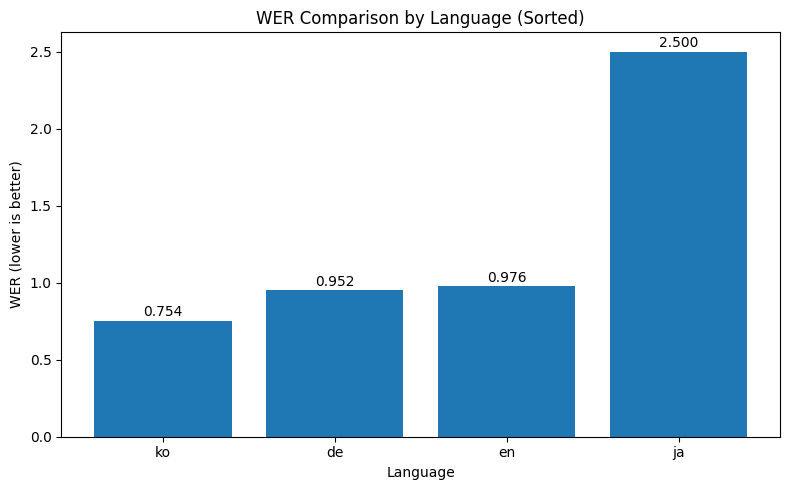

In [12]:
import matplotlib.pyplot as plt

# 오름차순 정렬된 결과로 시각화
sorted_items = sorted(lang_wer_results.items(), key=lambda x: x[1])
langs_sorted = [x[0] for x in sorted_items]
scores_sorted = [x[1] for x in sorted_items]

plt.figure(figsize=(8, 5))
bars = plt.bar(langs_sorted, scores_sorted)
plt.title("WER Comparison by Language (Sorted)")
plt.xlabel("Language")
plt.ylabel("WER (lower is better)")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("wer_comparison_chart_base_sorted.png")
plt.show()